In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
true_tensor = np.load("../2015-5appliances-true-agg.npy")

In [4]:
APPLIANCES_ORDER= ['aggregate', 'hvac', 'fridge', 'dr', 'dw', 'mw']

In [5]:
app_readings = {}
for index, appliance in enumerate(APPLIANCES_ORDER):
    app_readings[appliance] = true_tensor[:, index, :, :]

In [91]:
day_start = 0
num_days = 16
home_id = 25

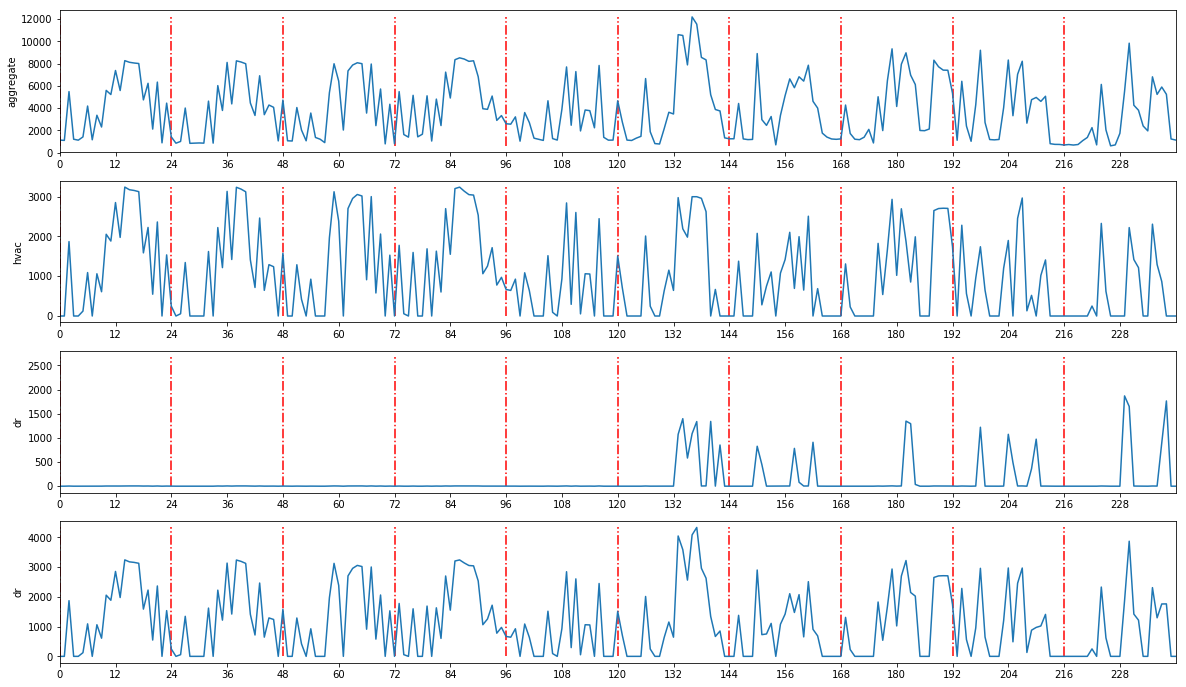

In [78]:
fig, axes = plt.subplots(nrows=4, figsize=(20, 12))
ax = axes.flatten()
xticks = np.arange(0, 240,12)
for index, appliance in enumerate(['aggregate', 'hvac', 'dr']):
    readings = app_readings[appliance][home_id, day_start:(day_start + num_days), :].copy()
    readings = readings.reshape(1, -1)
    pd.DataFrame(readings).T.plot(ax=ax[index], legend=False)
    ax[index].set_xlim(0, 240)
    ax[index].set_xticks(xticks)
    ax[index].set_ylabel(appliance)
    for i in range(10):
        ax[index].vlines(24*i, ymin=readings.min(), ymax=readings.max(), color='r', linestyles='dashdot')

index += 1
readings = app_readings['hvac'][home_id, day_start:(day_start)+num_days, :].copy() + app_readings['dr'][home_id, day_start:(day_start)+num_days, :].copy()
readings = readings.reshape(1, -1)
pd.DataFrame(readings).T.plot(ax=ax[index], legend=False)
ax[index].set_xlim(0, 240)
ax[index].set_xticks(xticks)
ax[index].set_ylabel(appliance)
for i in range(10):
        ax[index].vlines(24*i, ymin=readings.min(), ymax=readings.max(), color='r', linestyles='dashdot')


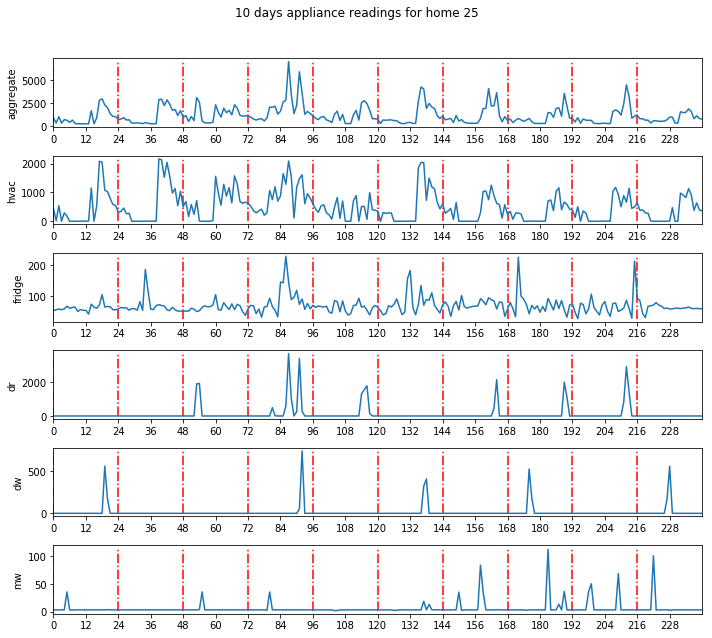

In [93]:
fig, axes = plt.subplots(nrows=6, figsize=(10, 9))
ax = axes.flatten()
xticks = np.arange(0, 240,12)
for index, appliance in enumerate(APPLIANCES_ORDER):
    readings = app_readings[appliance][home_id, day_start:(day_start + num_days), :].copy()
    readings = readings.reshape(1, -1)
    pd.DataFrame(readings).T.plot(ax=ax[index], legend=False)
    ax[index].set_xlim(0, 240)
    ax[index].set_xticks(xticks)
    ax[index].set_ylabel(appliance)
    for i in range(10):
        ax[index].vlines(24*i, ymin=readings.min(), ymax=readings.max(), color='r', linestyles='dashdot')
fig.suptitle("10 days appliance readings for home 25")
fig.tight_layout()
fig.subplots_adjust(top=0.9)

In [8]:
import seaborn as sns

Text(0.5,0.98,'Appliance Readings for Home 25')

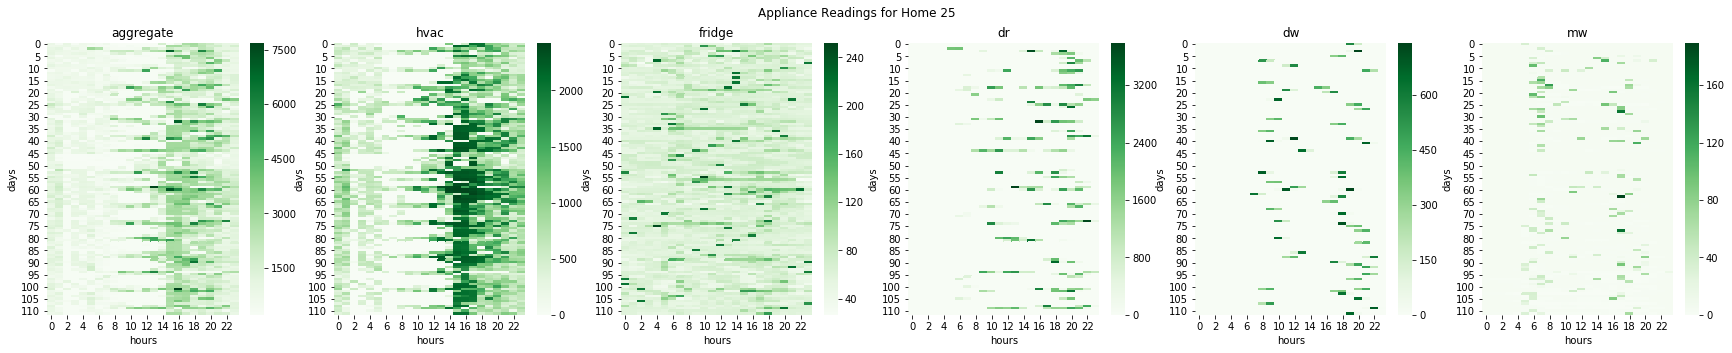

In [95]:
fig, axes = plt.subplots(ncols=6, figsize=(30, 5))
ax = axes.flatten()
home_id = 25


for index, appliance in enumerate(APPLIANCES_ORDER[:]):
    readings = app_readings[appliance][home_id].copy()
    sns.heatmap(readings, ax=ax[index], cmap="Greens")
    ax[index].set_title(appliance)
    ax[index].set_ylabel('days')
    ax[index].set_xlabel('hours')
fig.suptitle("Appliance Readings for Home 25")

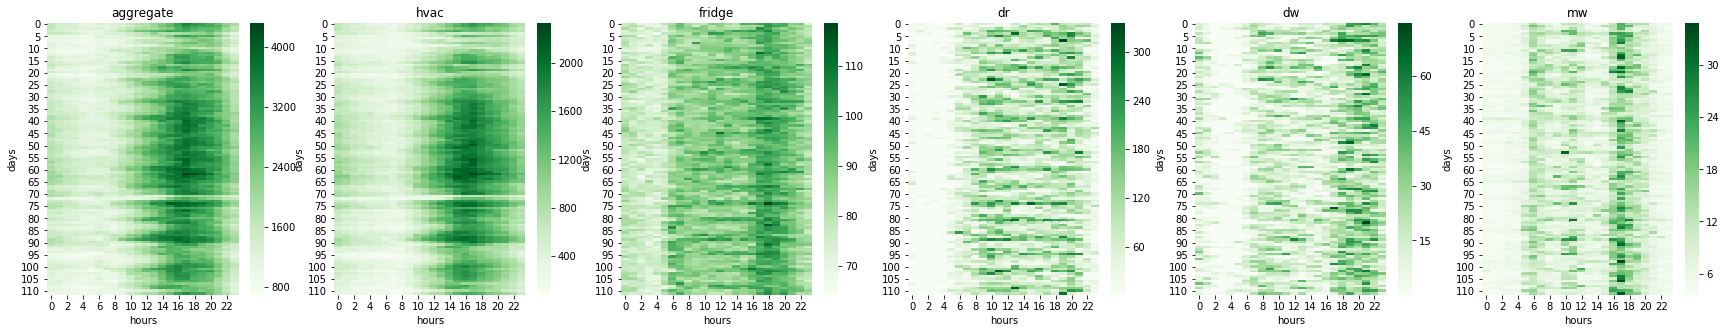

In [53]:
fig, axes = plt.subplots(ncols=6, figsize=(30, 5))
ax = axes.flatten()
home_id = 46


for index, appliance in enumerate(APPLIANCES_ORDER[:]):
    readings = app_readings[appliance].mean(axis=0).copy()
    sns.heatmap(readings, ax=ax[index], cmap="Greens")
    ax[index].set_title(appliance)
    ax[index].set_ylabel('days')
    ax[index].set_xlabel('hours')

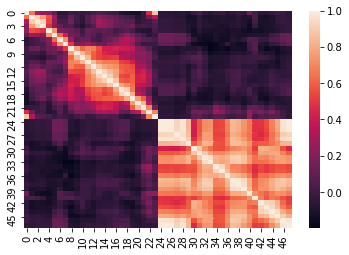

In [64]:
# correlation among appliances
# for every home and every day
mw_readings = app_readings['mw']
mw_readings = mw_readings.mean(axis=1)

dw_readings = app_readings['dw']
dw_readings = dw_readings.mean(axis=1)

dw_mw_readings = np.hstack([dw_readings, mw_readings])
sns.heatmap(pd.DataFrame(dw_mw_readings).corr())

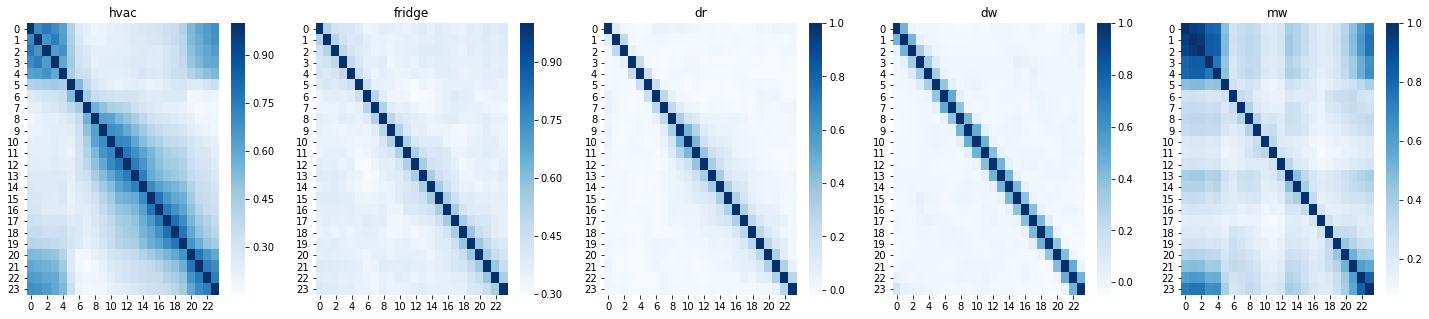

In [14]:
# correlation inside one day
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))
ax = axes.flatten()
for index, appliance in enumerate(APPLIANCES_ORDER[1:]):
    readings = app_readings[appliance].copy()
    readings = readings.reshape(-1, 24)
    sns.heatmap(pd.DataFrame(readings).corr(), cmap='Blues', ax=ax[index])
    ax[index].set_title(appliance)

In [39]:
import math

[  0  24  48  72  96 120 144 168 192 216 240 264 288 312 336 360]


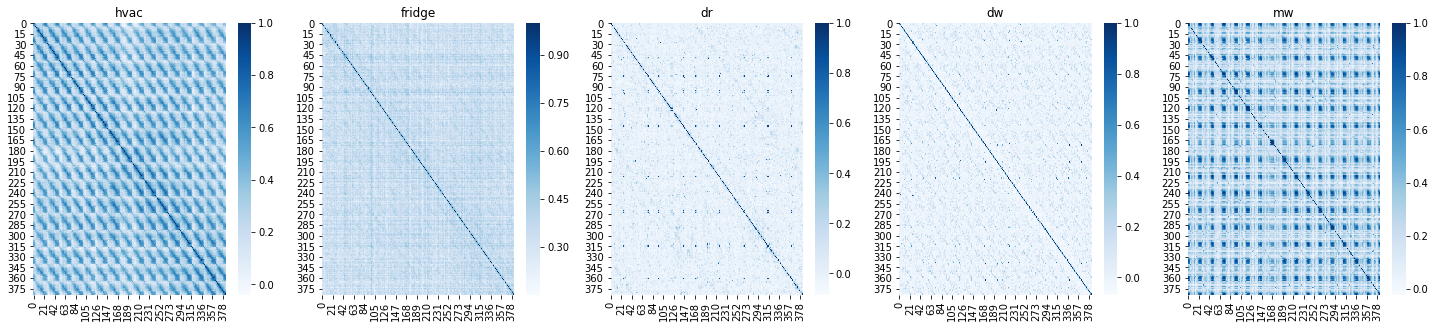

In [41]:
# correlation across days
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))
ax = axes.flatten()
ticks = np.arange(0, 24*16, 24)
for index, appliance in enumerate(APPLIANCES_ORDER[1:]):
    readings = app_readings[appliance].copy()
    readings= readings.reshape(68, -1, 24*16)
    readings = readings.reshape(-1, 24*16)
    sns.heatmap(pd.DataFrame(readings).corr(), cmap='Blues', ax=ax[index])
    ax[index].set_title(appliance)
